In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

HRM1017 analogread analysis


In [2]:
si=75.8
print("sampling interval for N=1024*1024: ", si)
freq=1/(si/1024/1024)
print("sampling frequency : ", freq, "Hz")

sampling interval for N=1024*1024:  75.8
sampling frequency :  13833.456464379948 Hz


In [14]:
data=np.loadtxt('hrm1017.dat', delimiter=',')
#plt.plot(data)

In [26]:
def funcM(x,t):
    ret=sum(x[0:N2])+sum(x[t:N2+t])
    return ret

7.0158996582


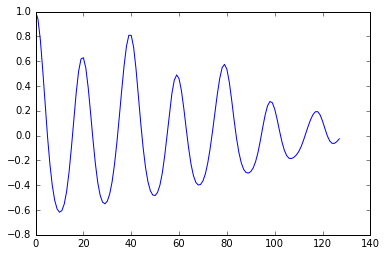

In [36]:
N=256
N2=128
x=data
x=(x-512)/512
x[N2:N] = np.zeros(N2)
#plt.plot(x)

# smarter way paper
F=np.fft.fft(x)
#plt.plot(np.real(F))
ps=np.real(F*np.conjugate(F))
#plt.plot(ps)
r=np.real(np.fft.ifft(ps))
x2=x*x
m=np.zeros(N2)
for i in np.arange(N2):
    m[i]=funcM(x2,i)
#plt.plot(m)
print(m[0])
r=r[0:N2]
nsdf=2*r/m
plt.plot(nsdf)

256
[ 334.  353.  392.  447.  502.  545.  568.  577.  579.  574.]
[ 63854.00000000    +0.j            676.18177808-40780.87768598j
   -107.58814645  -131.70628065j    796.66680102-13883.43322314j
   -361.41422509  -456.94782129j    982.90419741 -8867.89913448j
  -2096.62624387 -1647.38365022j   -743.31560536 -3609.13323901j
    892.34725536  -215.09434194j    232.82021827 -4037.97943346j]
[ 334. +6.12843110e-14j  353. -1.66533454e-15j  392. -5.25935397e-14j
  447. -5.97299987e-14j  502. +4.08562073e-14j  545. +3.65263375e-14j
  568. -1.64623324e-14j  577. -3.50830476e-14j  579. -3.06439723e-14j
  574. -1.35657115e-14j]


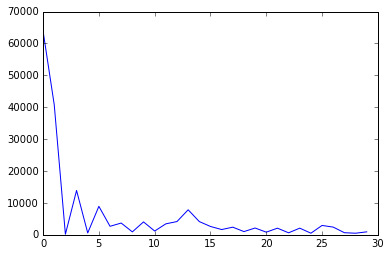

In [7]:

F=np.fft.fft(x)
f=np.fft.ifft(F)
#print(ns)
#print(np.sin(1 * 2.0 * np.pi/N))
print(len(F))
print(x[0:10])
print(F[0:10]) # /N for fixed point fft
print(f[0:10])
plt.plot(abs(F[0:30]))
#plt.show()